# import essential librarys and Set up GPU 

In [1]:
import numpy as np
import pandas as pd
import glob
from pathlib import Path
from collections import namedtuple
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_colwidth', 1000)

#set up GPU (optional)
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"
from tensorflow.python.client import device_lib
print( device_lib.list_local_devices())
import sys
sys.path.append('/extra/pjsadows0/libs/shared/gpu_lock/')


# Raw signal voltage Reading & Processing

In [11]:
path = os.getcwd()
path+="\\FFT for FD\\Resolver FD"
File= namedtuple("File",['slot','error_degree','path'])
xls_files=[]
p=Path(path)
for item in p.glob('**/*'):
    if (item.name=="Winding Plot 1.csv"):
        slot="S"+item.parent.parent.name.split()[1]
        error_degree=item.parent.name
        path=Path.resolve(item)
        xls_files.append(File(slot,error_degree,path))
        
dfSource=pd.DataFrame(xls_files)
dfSource.sample()

,slot,error_degree,path
90,S9,17.5,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 9\17.5\Winding Plot 1.csv
91,S9,2.5,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 9\2.5\Winding Plot 1.csv
92,S9,20,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 9\20\Winding Plot 1.csv
93,S9,5,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 9\5\Winding Plot 1.csv
94,S9,7.5,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 9\7.5\Winding Plot 1.csv


In [29]:
df = pd.DataFrame()
pd.set_option("display.precision", 8)
for index, row in dfSource.iloc.iterrows():
    FFT=pd.read_csv(row["path"],header=None,skiprows=1,usecols=[0,1])
    dummy=row
    dummy=dummy.append(FFT.iloc[:,1])
    df=df.append(dummy,ignore_index=True)
    
conditions = [
    (df['slot'].eq('S1') | df['slot'].eq('S7')),
    (df['slot'].eq('S4') | df['slot'].eq('S10')),
    (df['slot'].eq('S3') | df['slot'].eq('S5')| df['slot'].eq('S11') | df['slot'].eq('S9')),
    (df['slot'].eq('S2') | df['slot'].eq('S6')| df['slot'].eq('S8') | df['slot'].eq('S12'))]

choices = [1,2,3,4]

df['Group'] = np.select(conditions, choices, default=0)

df.to_excel("Complete_raw_signal_Data2.xlsx")
df.head()



#

,0,1,2,3,4,5,6,7,8,9,...,10995,10996,10997,10998,10999,11000,error_degree,path,slot,Group
0,1.11164634,0.96474697,0.81784760,0.54641726,0.19180826,-0.19198972,-0.54651681,-0.81779423,-0.96451933,-0.96436723,...,-0.54610717,-0.19184164,0.19166049,0.54599647,0.81722008,0.96400611,10,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 1\10\Winding Plot 1.csv,S1,1
1,1.11240168,0.96540254,0.81840339,0.54678857,0.19193875,-0.19211999,-0.54688822,-0.81835008,-0.96517495,-0.96502270,...,-0.54681061,-0.19208894,0.19190716,0.54669919,0.81827201,0.96524759,12.5,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 1\12.5\Winding Plot 1.csv,S1,1


In [82]:
path = os.getcwd()
path+="\\Complete_raw_signal_Data.xlsx"
df=pd.read_excel(path)
df.drop(df.columns[0],inplace=True,axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10995,10996,10997,10998,10999,11000,error_degree,path,slot,group
0,1.111646,0.964747,0.817848,0.546417,0.191808,-0.191990,-0.546517,-0.817794,-0.964519,-0.964367,...,-0.546107,-0.191842,0.191660,0.545996,0.817220,0.964006,10.0,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 1\10\Winding Plot 1.csv,S1,1
1,1.112402,0.965403,0.818403,0.546789,0.191939,-0.192120,-0.546888,-0.818350,-0.965175,-0.965023,...,-0.546811,-0.192089,0.191907,0.546699,0.818272,0.965248,12.5,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 1\12.5\Winding Plot 1.csv,S1,1
2,1.113877,0.966683,0.819489,0.547513,0.192194,-0.192374,-0.547613,-0.819435,-0.966455,-0.966303,...,-0.547344,-0.192276,0.192095,0.547234,0.819072,0.966191,15.0,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 1\15\Winding Plot 1.csv,S1,1
3,1.115091,0.967737,0.820383,0.548111,0.192404,-0.192585,-0.548210,-0.820329,-0.967509,-0.967357,...,-0.548250,-0.192594,0.192412,0.548139,0.820427,0.967790,17.5,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 1\17.5\Winding Plot 1.csv,S1,1
4,1.109823,0.963164,0.816506,0.545521,0.191494,-0.191676,-0.545620,-0.816453,-0.962937,-0.962785,...,-0.545617,-0.191670,0.191488,0.545506,0.816485,0.963138,2.5,C:\Users\pedis\Desktop\Papers\khajuyi paper\Confrence\PEDSTC 2022\FFT for FD\Resolver FD\Results FD\SE 1\2.5\Winding Plot 1.csv,S1,1


# Siamese network for Scenario 1 (4-Way K-shot)
According to Fig. 4, the static eccentricity locations can be categorized into four main groups owing to the similarity between signal winding turn numbers (12-slot 5-x resolver with  VTOW configuration). In this scenario, the aim of the suggested few-shot learning Siamese network is to diagnose the static eccentricity location under these tooth groups. Since the number of faulty signals in a winding group is more than in each tooth, the diagnosis of a faulty winding group is more accurate, which has merit in severe data scarcity.

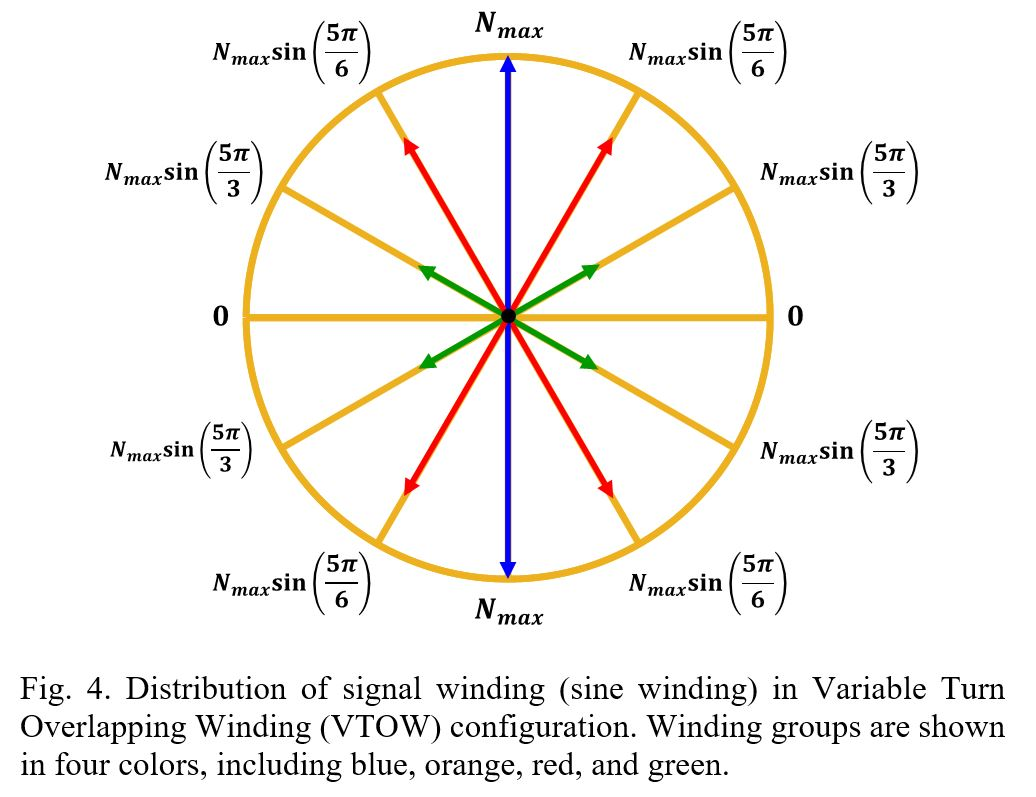

In [83]:
#load Siamese model
import imp
import models
imp.reload(models)
in_shape=(11001,1)
siamese_net=models.load_siamese_net_1D(in_shape)
print('\nsiamese_net summary:')
siamese_net.summary()


siamese_net summary:
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 11001, 1)]   0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 11001, 1)]   0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, 100)          159572      ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 100)          0           ['seq

In [ ]:
# normalizing raw voltage signals/ define 4 classes  / spliting to train & test

from sklearn.preprocessing import MinMaxScaler,StandardScaler
### load dataset
X = df.iloc[:,:-4].astype(float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = df.loc[:,"group"]
train_classes = sorted(list(set(Y)))
train_indices = [np.where(Y == i)[0] for i in train_classes]

train_idxs = []
val_idxs = []
for i, c in enumerate(train_classes):
    if(len(train_indices[i])<=16):
        select_idx = train_indices[i][np.random.choice(len(train_indices[i]), 10, replace=False)]
    else:
        select_idx = train_indices[i][np.random.choice(len(train_indices[i]), 22, replace=False)]
        
    train_idxs.extend(select_idx)
X_train_siamese, y_train_siamese = X[train_idxs],Y[train_idxs]
X_test_siamese, y_test_siamese = np.delete(X, train_idxs, 0),Y.drop(train_idxs)

print(X_train_siamese.shape,y_train_siamese.shape)
print(X_test_siamese.shape, y_test_siamese.shape)

In [6]:
settings = {
  "N_way": 4,           # number of classes for one-shot tasks
  "batch_size": 32,
  "best": 0,
  "evaluate_every": 25,   # number of iterations for evaluation
  "loss_every": 20,      # number of iterations for printing loss 
  "n_iter": 5000,
  "n_val": 2,          #number of validation tasks for one-shot
  "n": 0,
}

In [7]:
import imp
import siamese_1D
imp.reload(siamese_1D)

is_training = True

siamese_loader = siamese_1D.Siamese_Loader(X_train_siamese,
                                y_train_siamese,
                                X_test_siamese,
                                y_test_siamese)

if(is_training):
    print(siamese_1D.train_and_test_oneshot(settings,siamese_net,siamese_loader))

{'train': [1, 2, 3, 4], 'val': [1, 2, 3, 4]}
64 31
[10, 10, 22, 22] [6, 6, 9, 10]
{'N_way': 4, 'batch_size': 32, 'best': -1, 'evaluate_every': 25, 'loss_every': 20, 'n_iter': 5000, 'n_val': 2, 'n': 0, 'save_path': 'tmp', 'save_weights_file': 'weights.hdf5'}
****************************************training****************************************
Evaluating model on 31 random 4 way one-shot learning tasks ...

iteration 0 evaluating: 45.16129032258065%
interation 40, Loss: 0.58246,
iteration 50 evaluating: 51.61290322580645%
interation 140, Loss: 0.40697,
iteration 150 evaluating: 80.64516129032258%
interation 160, Loss: 0.32482,
iteration 175 evaluating: 80.64516129032258%
interation 180, Loss: 0.25210,
iteration 200 evaluating: 80.64516129032258%
interation 220, Loss: 0.31495,
iteration 225 evaluating: 80.64516129032258%
interation 240, Loss: 0.29754,
iteration 250 evaluating: 80.64516129032258%
interation 260, Loss: 0.31379,
iteration 275 evaluating: 80.64516129032258%
interation 280,

### Accuracy on Training set

In [ ]:
siamese_loader.set_val(X_train_siamese,y_train_siamese)
val_acc,preds, prods = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes['val']),
                                                                 len(siamese_loader.data['val']),verbose=0)
print(val_acc,preds.shape, prods.shape)

### Accuracy of one-shot model on testing set

In [11]:
 val_acc,preds, prods = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes['val']),
                                                                 len(siamese_loader.data['val']),verbose=0)
print(val_acc,preds.shape, prods.shape)

92.1875 (64, 2) (64, 4, 1)


### Accuracy of Few-shot model on testing set 

In [12]:
score_few_shot,score_few_shot_prob,preds,prod_preds=siamese_loader.test_fewshot2(siamese_net,len(siamese_loader.classes['val']),
                                                 len(siamese_loader.data['val']),verbose=False,shots=5)

92.1875 (64, 2) (64, 4, 1)
92.1875 (64, 2) (64, 4, 1)
89.0625 (64, 2) (64, 4, 1)
92.1875 (64, 2) (64, 4, 1)
92.1875 (64, 2) (64, 4, 1)
5_shot Accuracy based on 5 one-shot prediction: 92.1875
5_shot Accuracy based on _probabilty: 0.0


# Siamese network for Scenario 2 (12-Way K-shot)
In real-world drive systems of industry, the accurate diagnosis and modification of the static eccentricity locations are obligatory to ensure the safety and long life of the resolver, primary motor, and drive system. Accordingly, in this scenario, the few-shot learning Siamese network aims to diagnose the exact static eccentricity location under each tooth, 12 teeth, with limited data using K-shots. 

In [84]:
#reload the Siamese model for 12 classes
import imp
import models
imp.reload(models)
in_shape=(11001,1)
siamese_net=models.load_siamese_net_1D(in_shape)
print('\nsiamese_net summary:')
siamese_net.summary()


siamese_net summary:
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 11001, 1)]   0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 11001, 1)]   0           []                               
                                                                                                  
 sequential_4 (Sequential)      (None, 100)          159572      ['input_5[0][0]',                
                                                                  'input_6[0][0]']                
                                                                                                  
 lambda_2 (Lambda)              (None, 100)          0           ['seq

In [ ]:
# normalizing raw voltage signals/ define 12 classes  /spliting to train & test
from sklearn.preprocessing import LabelEncoder
### load dataset
X = df.iloc[:,:-4].astype(float)
# X=X.to_numpy()
# scaler = StandardScaler()
scaler =MinMaxScaler()
X = scaler.fit_transform(X)

Y_12 = df.loc[:,'slot']
encoder = LabelEncoder()
encoder.fit(Y_12)
encoded_Y_12 = encoder.transform(Y_12)
Y_12=pd.Series(encoded_Y_12)
Y=Y_12

train_classes = sorted(list(set(Y)))
train_indices = [np.where(Y == i)[0] for i in train_classes]

train_idxs = []
val_idxs = []
for i, c in enumerate(train_classes):
    select_idx = train_indices[i][np.random.choice(len(train_indices[i]), 4, replace=False)]   
#     split = int(0.1*10)
    train_idxs.extend(select_idx)
#     val_idxs.extend(select_idx[split:])
X_train_siamese, y_train_siamese = X[train_idxs],Y[train_idxs]
X_test_siamese, y_test_siamese = np.delete(X, train_idxs, 0),Y.drop(train_idxs)
# X_val_siamese, y_val_siamese = X[val_idxs],Y[val_idxs], 

print(X_train_siamese.shape,y_train_siamese.shape)
print(X_test_siamese.shape, y_test_siamese.shape)

In [86]:
settings = {
  "N_way": 12,           # number of classes for one-shot tasks
  "batch_size": 32,
  "best": 0,
  "evaluate_every": 25,   # number of iterations for evaluation
  "loss_every": 20,      # number of iterations for printing loss 
  "n_iter": 5000,
  "n_val": 2,          #number of validation tasks for one-shot
  "n": 0,
}

In [ ]:
# training the Siamese network for 12 classes
import imp
import siamese_1D
imp.reload(siamese_1D)

is_training = True

siamese_loader = siamese_1D.Siamese_Loader(X_train_siamese,
                                y_train_siamese,
                                X_test_siamese,
                                y_test_siamese)

if(is_training):
    print(siamese_1D.train_and_test_oneshot(settings,siamese_net,siamese_loader))

In [296]:
# training the Siamese network for 12 classes
import imp
import siamese_1D
imp.reload(siamese_1D)

is_training = True

siamese_loader = siamese_1D.Siamese_Loader(X_train_siamese,
                                y_train_siamese,
                                X_test_siamese,
                                y_test_siamese)

if(is_training):
    print(siamese_1D.train_and_test_oneshot(settings,siamese_net,siamese_loader))

{'train': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'val': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
48 48
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4] [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
{'N_way': 12, 'batch_size': 32, 'best': -1, 'evaluate_every': 25, 'loss_every': 20, 'n_iter': 800, 'n_val': 2, 'n': 0, 'save_path': 'tmp2', 'save_weights_file': 'weights.hdf5'}
****************************************training****************************************
Evaluating model on 48 random 12 way one-shot learning tasks ...

iteration 0 evaluating: 58.333333333333336%
interation 20, Loss: 0.20889,
iteration 25 evaluating: 75.0%
interation 40, Loss: 0.11845,
iteration 50 evaluating: 75.0%
interation 60, Loss: 0.13910,
iteration 75 evaluating: 77.08333333333333%
interation 140, Loss: 0.14507,
iteration 150 evaluating: 79.16666666666667%
interation 260, Loss: 0.23184,
iteration 275 evaluating: 83.33333333333333%
interation 580, Loss: 0.18862,
iteration 600 evaluating: 83.33333333333333%
interation 780, Loss: 0

### Accuracy of one-shot model on testing set

In [297]:
 val_acc,preds, prods = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes['val']),
                                                                 len(siamese_loader.data['val']),verbose=0)
print(val_acc,preds.shape, prods.shape)

81.25 (48, 2) (48, 12, 1)


### Accuracy of Few-shot model on testing set 

In [298]:
score_few_shot,score_few_shot_prob,preds_few_shot,prods_few_shot=siamese_loader.test_fewshot2(siamese_net,
                                len(siamese_loader.classes['val']),len(siamese_loader.data['val']),verbose=False,shots=4)

81.25 (48, 2) (48, 12, 1)
79.16666666666667 (48, 2) (48, 12, 1)
81.25 (48, 2) (48, 12, 1)
79.16666666666667 (48, 2) (48, 12, 1)
4_shot Accuracy based on 4 one-shot prediction: 87.5
4_shot Accuracy based on _probabilty: 83.33333333333334


# Confusion Matrix & T-SNE Plot

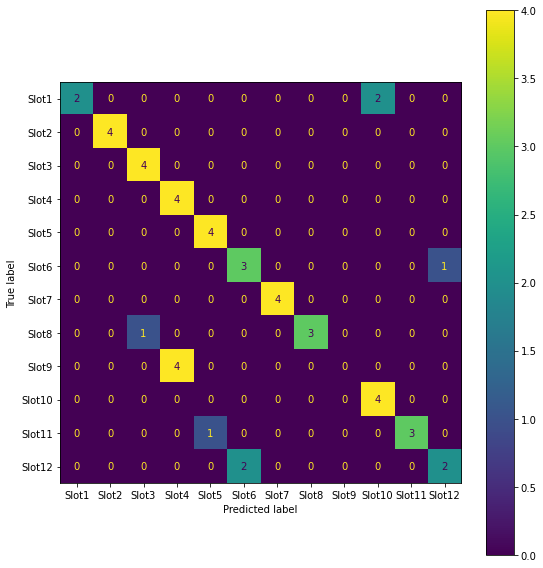

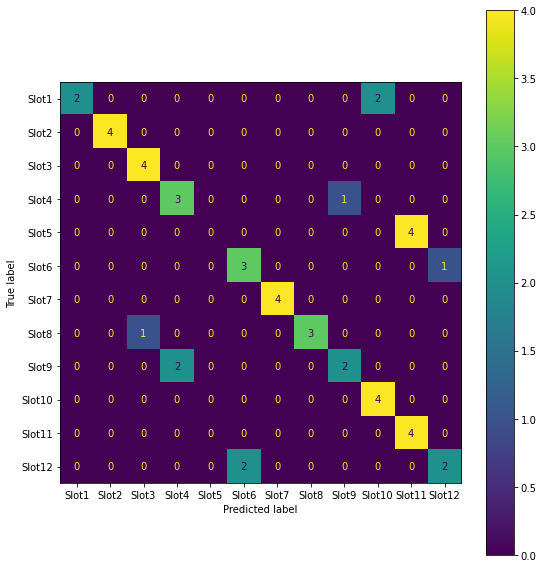

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


Y_test,Y_pred=y_test_siamese,preds_few_shot
# creating a confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.pyplot.subplots(figsize=(8, 8))
Labels_=["Slot{}".format(i+1) for i in range(len(set(y_test_siamese)))]
cmp = ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=Labels_)
cmp.plot(ax=ax)
plt.pyplot.show();
#####

Y_test,Y_pred=y_test_siamese,prods_few_shot
# creating a confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.pyplot.subplots(figsize=(8, 8))
Labels_=["Slot{}".format(i+1) for i in range(len(set(y_test_siamese)))]
cmp = ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=Labels_)
cmp.plot(ax=ax)
plt.pyplot.show();

In [ ]:
from keras import backend as K
import numpy as np
import warnings
warnings.filterwarnings('ignore')  
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.manifold import TSNE; HAS_SK = True
def plot_with_labels(data):
    #loop through labels and plot each cluster
    sns.set(rc={'figure.figsize':(5.5,5.5)})
    plt.figure()
    for i, label in enumerate(range(1,len(set(Y_test))+1)):

        #add data points 
        plt.scatter(x=data.loc[data['label']==label, 'x'], 
                    y=data.loc[data['label']==label,'y'], 
                    color=cm.rainbow(int(255 * i / 9)), 
                    alpha=0.7)

        #add label
        plt.annotate(label, 
                     data.loc[data['label']==label,['x','y']].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=17,
                     weight='bold',
                     alpha=0.8,
                     color='black')     
 

X_test,Y_test=X,Y
# X_test,Y_test=X_test_siamese,y_test_siamese.reset_index(drop=True)

intermediate_tensor_function = K.function([siamese_net.layers[2].layers[0].input],
                                          [siamese_net.layers[2].layers[-1].output])

intermediate_tensor = intermediate_tensor_function([X_test])[0]

# Visualization of trained flatten layer (T-SNE)
tsne = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2000)
low_dim_embs = tsne.fit_transform(intermediate_tensor)
p_data = pd.DataFrame(columns=['x', 'y', 'label'])
p_data.x = low_dim_embs[:, 0]
p_data.y = low_dim_embs[:, 1]
p_data.label = Y_test
plot_with_labels(p_data)
# plt.savefig("%s/-tsne-one-shot.pdf" % (settings["save_path"]))
plt.savefig("pictures/Confusion Matrix & T-SNE/-tsne-one-shot.svg")

In [163]:
p_data.to_excel("pictures/Confusion Matrix & T-SNE/1D-CNN Scatterplot_data.xlsx")

#  Model Evaluation on Unseen Class 
It is usually difficult to collect enough data on faulty conditions that rarely occur in different working conditions. So, a classifier may face inequality of classes in diagnosis. More specifically, in case of new unseen faulty conditions, traditional learnings, such as 1D-CNN, will fail to diagnose, and retraining is necessary, whereas few-shot learning can diagnose new unseen faulty conditions by just providing a few new signals in the support set. In order to assess the suggested few-shot learning Siamese network in this case, the model is trained by removing 2, 4, and 6 teeth in the train set to diagnose the static eccentricity location for all teeth in the test set.

In [ ]:
train_classes = sorted(list(set(Y)))
train_indices = [np.where(Y == i)[0] for i in train_classes]
unseen_group=[1,2,3,4]
train_classes = [ele for ele in train_classes if ele not in unseen_group]
unseen_class_indices = [np.where(Y == ele)[0]  for ele in unseen_group]
unseenclass_select_idx=[]
for i in range(len(unseen_group)):
    select_idx=unseen_class_indices[i][np.random.choice(len(unseen_class_indices[i]), 5, replace=False)]
    unseenclass_select_idx.extend(select_idx)
unseenclass_select_idx
train_indices = [np.where(Y == i)[0] for i in train_classes]


train_idxs = []
val_idxs = []
for i, c in enumerate(train_classes):
    select_idx = train_indices[i][np.random.choice(len(train_indices[i]), 5, replace=False)]   
    train_idxs.extend(select_idx)

X_train_siamese, y_train_siamese = X[train_idxs],Y[train_idxs]

val_idxs=train_idxs.copy()
for i in range(len(unseen_group)):
    val_idxs.extend(unseen_class_indices[i].tolist())
X_val_siamese, y_val_siamese = np.delete(X,val_idxs, 0),Y.drop(val_idxs)

test_idxs=train_idxs.copy()
test_idxs.extend(unseenclass_select_idx)

X_test_siamese, y_test_siamese= np.delete(X,test_idxs, 0),Y.drop(test_idxs)

print(X_train_siamese.shape,y_train_siamese.shape)
print(X_val_siamese.shape,y_val_siamese.shape)
print(X_test_siamese.shape, y_test_siamese.shape)

In [241]:
settings = {
  "N_way": len(set(Y))-len(unseen_group),           # how many classes for testing one-shot tasks>
  "batch_size": 32,
  "best": -1,
  "evaluate_every": 25,   # interval for evaluating on one-shot tasks
  "loss_every": 20,      # interval for printing loss (iterations)
  "n_iter": 400,
  "n_val": 2,          #how many one-shot tasks to validate on?
  "n": 0,
}

In [301]:
import imp
import siamese_1D
imp.reload(siamese_1D)

is_training = True

siamese_loader = siamese_1D.Siamese_Loader(X_train_siamese,
                                y_train_siamese,
                                X_val_siamese,
                                y_val_siamese)

if(is_training):
    print(siamese_1D.train_and_test_oneshot(settings,siamese_net,siamese_loader))

{'train': [0, 1, 4, 5, 6, 7, 8, 9, 10, 11], 'val': [0, 1, 4, 5, 6, 7, 8, 9, 10, 11]}
40 40
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4] [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
{'N_way': 10, 'batch_size': 32, 'best': -1, 'evaluate_every': 25, 'loss_every': 20, 'n_iter': 400, 'n_val': 2, 'n': 0, 'save_path': 'tmp2', 'save_weights_file': 'weights.hdf5'}
****************************************training****************************************
Evaluating model on 40 random 10 way one-shot learning tasks ...

iteration 0 evaluating: 60.0%
interation 40, Loss: 0.26154,
iteration 50 evaluating: 77.5%
interation 60, Loss: 0.24465,
iteration 75 evaluating: 80.0%
interation 120, Loss: 0.13670,
iteration 125 evaluating: 80.0%
interation 380, Loss: 0.05551,80.0


### Unseen-Class one-shot testing

In [303]:
# change val and train dataset to include unseen_class_idx
X_train_unseen, y_train_unseen = X[test_idxs],Y[test_idxs]

siamese_loader.set_val(X_test_siamese, y_test_siamese)
siamese_loader.set_train(X_train_unseen, y_train_unseen)

val_acc,preds, prods = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes['val']),
                                                                 len(siamese_loader.data['val']),verbose=0)
print(val_acc,preds.shape, prods.shape)

62.5 (48, 2) (48, 12, 1)


### Unseen-Class few-shot testing

In [304]:
score_few_shot,score_few_shot_prob,preds_few_shot,prods_few_shot=siamese_loader.test_fewshot2(siamese_net,len(siamese_loader.classes['val']),
                                                 len(siamese_loader.data['val']),verbose=False,shots=4)

70.83333333333333 (48, 2) (48, 12, 1)
64.58333333333333 (48, 2) (48, 12, 1)
68.75 (48, 2) (48, 12, 1)
66.66666666666667 (48, 2) (48, 12, 1)
4_shot Accuracy based on 4 one-shot prediction: 66.66666666666666
4_shot Accuracy based on _probabilty: 70.83333333333334


# Model Evaluation under Noise influence
According to the EV conversion kit layout, the electromagnetic coupling between PMSM, drive system, and resolver is intensively high. Directly mounting the resolver on the shaft and stator frame of PMSM intensifies the magnetic and electric field couplings. Moreover, high-frequency switching of MOSFETs in an inverter circuit will generate noise on the cables. As a result, electromagnetic noise in the resolver circuit and signal voltage emerges. In an industry environment, the possibility of gathering a data set without the effect of noise on the resolver signals is near zero, even with shielding. So, investigating the noise effect in signal voltages on the proficiency of few-shot learning in static eccentricity location diagnosis brings us closer to practicality. In the worst case, the signal-to-noise ratio, SNR, of the resolver signal is regarded as -3dB; the smaller the SNR, the stronger the noise: 
\begin{equation}\label{eq:SNR}
    \small
    \operatorname{SNR_{dB}} = 10\operatorname{log}_{10}(P_{signal}/P_{noise}) 
\end{equation}

In [327]:
def noise_rw(x,snr,isplot = False):
    snr1 = 10 ** (snr / 10.0)
    xpower = np.sum(x ** 2,axis=0) / len(x)
    npower = xpower / snr1
    noise = np.random.normal(0, np.sqrt(npower), x.shape)
    noise_data=x+noise
    if(isplot):
        print(snr,snr1,npower)
        print(np.sum(noise ** 2)/len(x))
        fig, axs = plt.subplots(nrows=3,ncols=x.shape[1], figsize=(8*x.shape[1], 6))
        for i in range(x.shape[1]):
            axs[0][i].plot(x[:,i])
            axs[0][i].set_title(signal_labels[i] + ' signal')
            axs[0][i].get_xaxis().set_visible(False)
            axs[1][i].plot(noise[:,i])
            axs[1][i].set_title(signal_labels[i] +' noise')
            axs[1][i].get_xaxis().set_visible(False)
            axs[2][i].plot(noise_data[:,i])
            axs[2][i].set_title(signal_labels[i] +' noise signal')
        plt.show()
    return noise_data

In [ ]:
snrs = [-3,-1,0,1,3]

# for snr in snrs:
#     X_test_noise = []
#     for x in data.X_test:
#         X_test_noise.append(utils.noise_rw(x,snr))
#     X_test_noise = np.array(X_test_noise)
                                                        
# change val and train dataset to include unseen_class_idx
# X_train_unseen, y_train_unseen = X[test_idxs],Y[test_idxs]

X_test_noise=noise_rw(X_val_siamese,-3)
siamese_loader.set_val(X_test_noise, y_val_siamese)

val_acc,preds, prods = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes['val']),
                                                                 len(siamese_loader.data['val']),verbose=0)
print(val_acc,preds.shape, prods.shape)